In [1]:
import h5py
import netCDF4
import numpy as np 

import os 

bands  = [  
['10.6V' , '10.6H'  , '18.7V'  ,  '18.7H'  , '23V'  , '37V' , '37H', '89V' , '89H'   ] , 
['166V' , '166H'  , '183+3V'  ,  '183+3V'     ]  ]

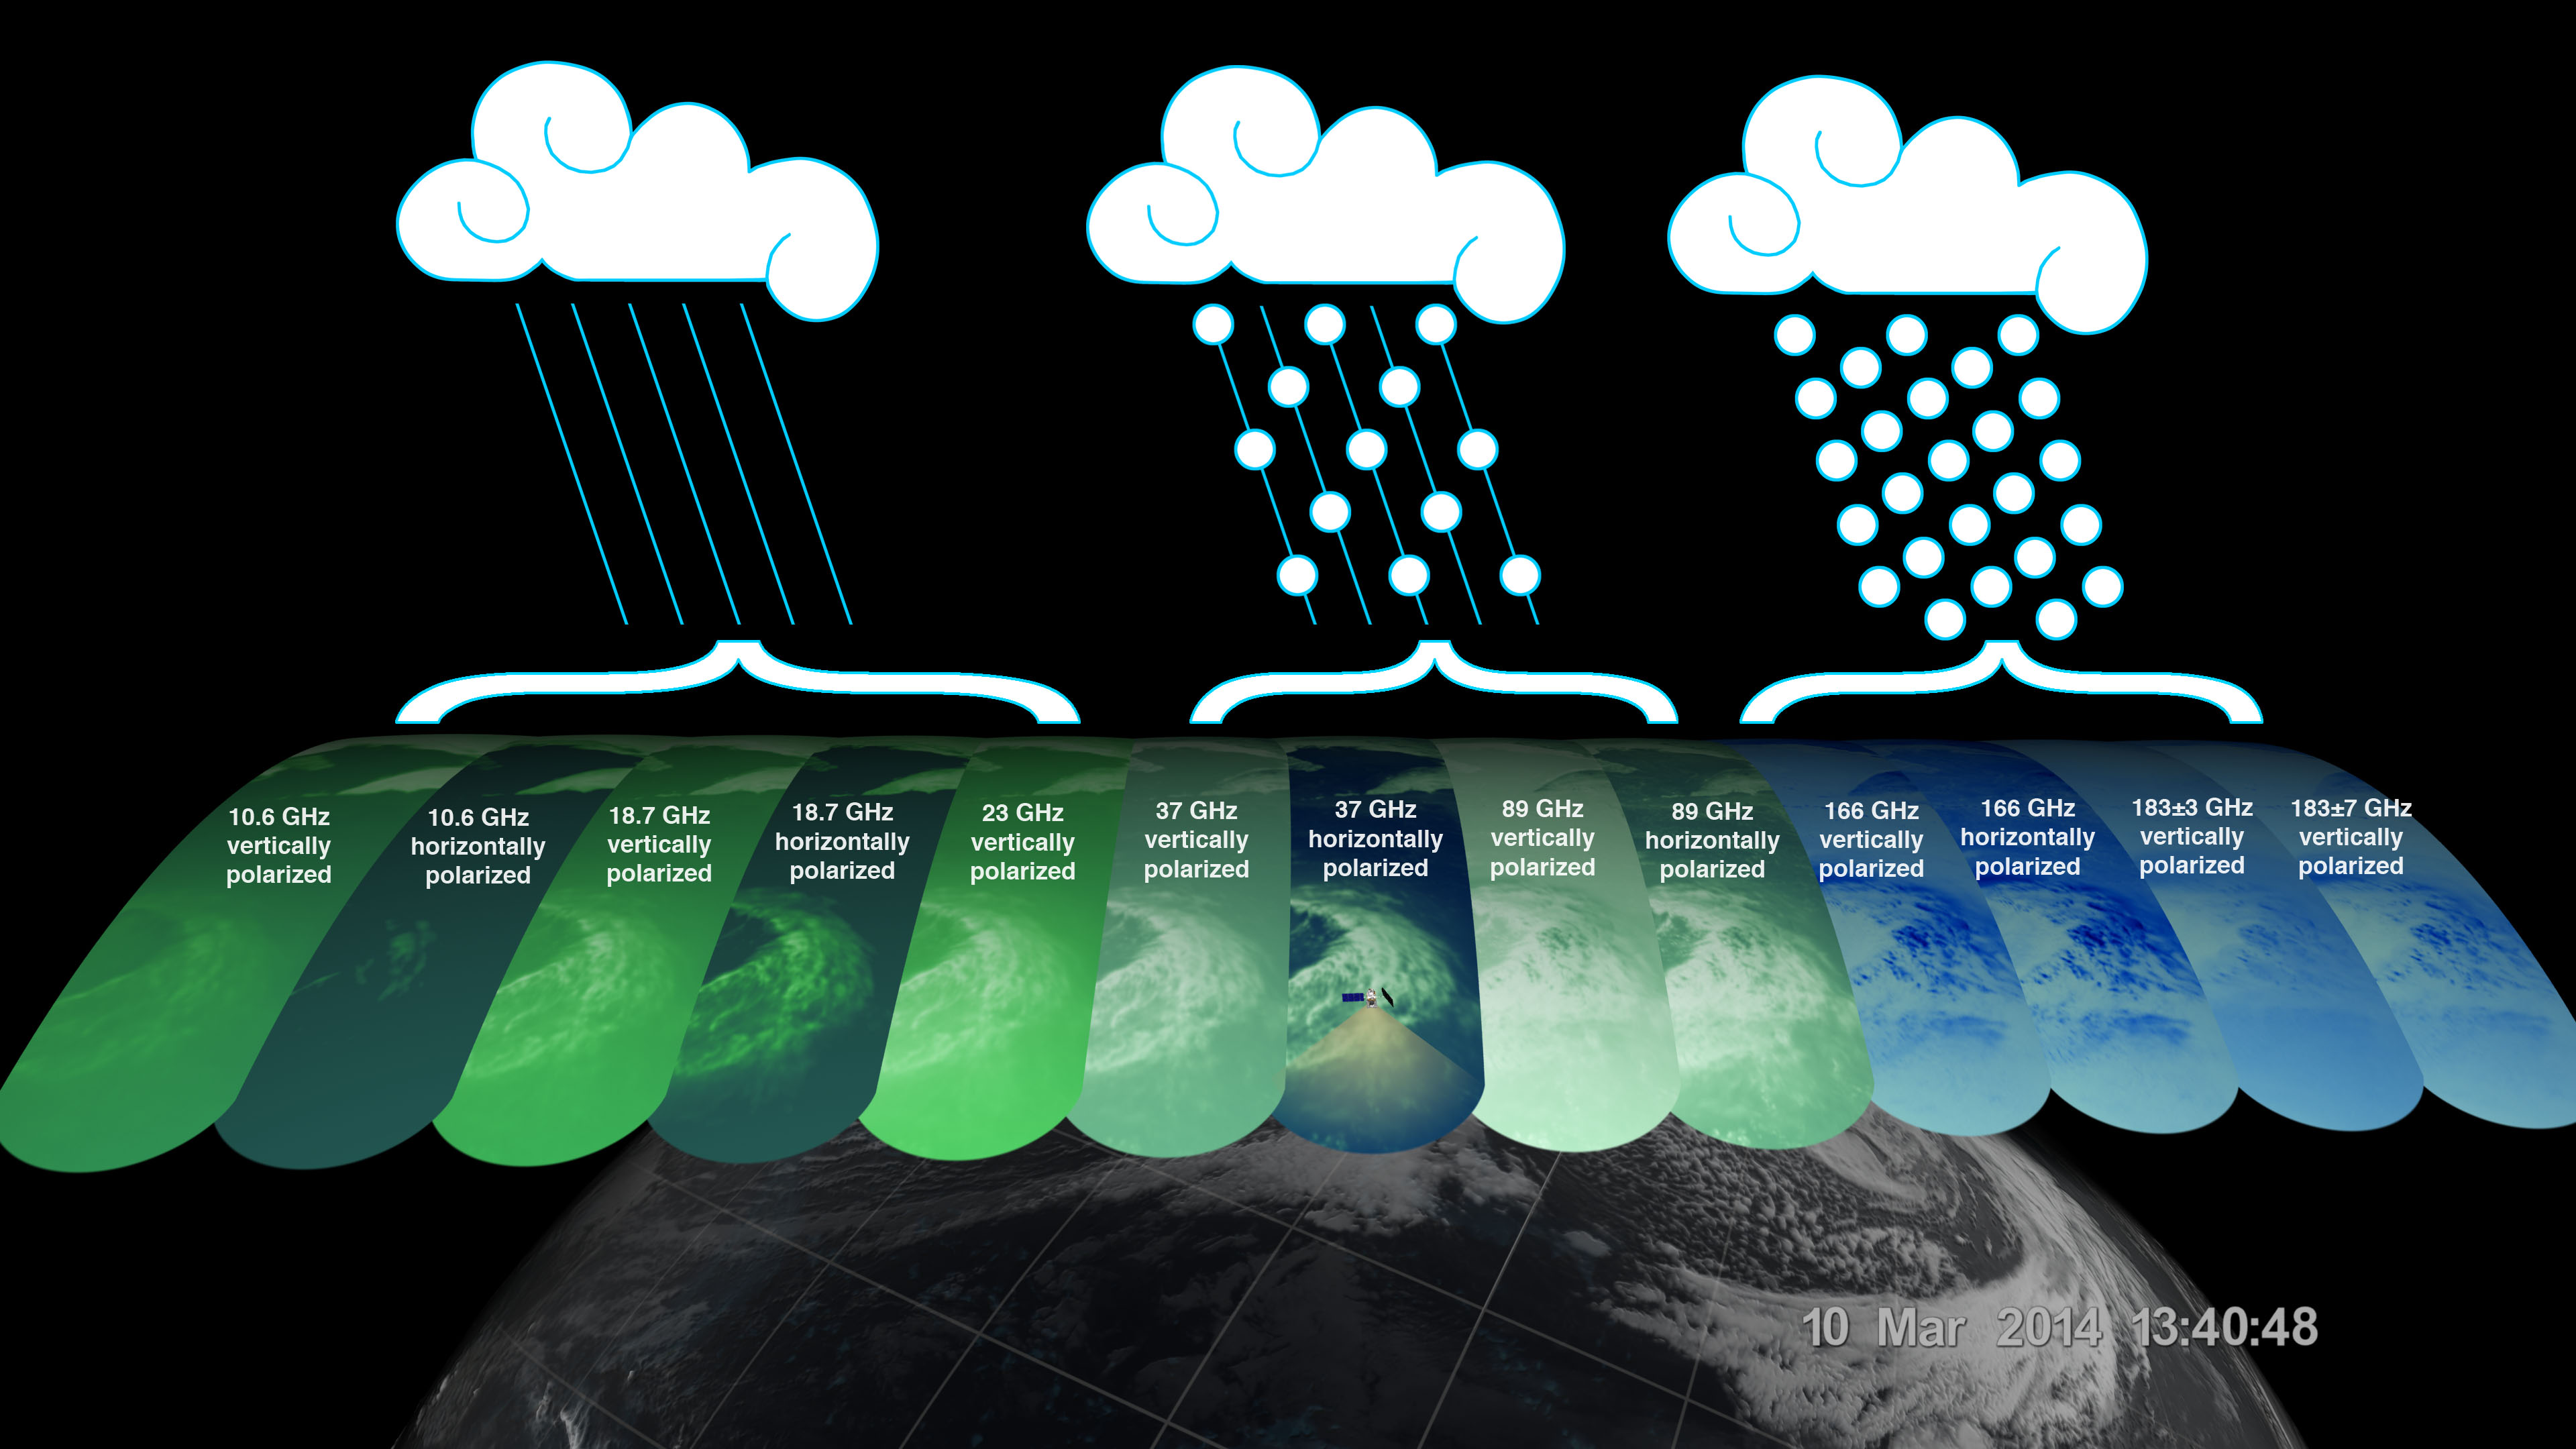

In [2]:
Folder_inputs = 'D:/DatasetAUS/GMI/'

Folder = { 
        'S1'  : r'd:/DatasetAUS/GMI_S1/' ,
        'S2'   :  r'd:/DatasetAUS/GMI_S2/'  
        }
for f in Folder :
    try : os.mkdir( Folder[f])
    except: pass 

files = os.listdir(Folder_inputs)

ord_keys =  [ 'Year'  ,  'Month'   ,    'DayOfMonth'   ,  'Hour'  , 'Minute'  ]
ord_keys_data = ['Latitude', 'Longitude', 'sunLocalTime', 'Quality', 'incidenceAngle', 'sunGlintAngle' ] 


In [10]:

file  = 'd:\DatasetAUS\GMI\1C.GPM.GMI.XCAL2016-C.20140304-S175932-E193159.000079.V07A.HDF5'

fp = r'd:\DatasetAUS\GMI\1C.GPM.GMI.XCAL2016-C.20140304-S175932-E193159.000079.V07A.HDF5' # Folder_inputs + file 

hdf = h5py.File(fp ,'r+' )
Keys = list(hdf.keys()) 
Key_s1 = hdf['S1'].keys()
arrays = np.array(hdf['S1']['Tc'])



OSError: Unable to synchronously open file (file signature not found)

In [4]:
hdf['S1'].keys()


<KeysViewHDF5 ['ScanTime', 'SCstatus', 'Latitude', 'Longitude', 'sunLocalTime', 'Quality', 'incidenceAngle', 'sunGlintAngle', 'incidenceAngleIndex', 'Tc']>

In [6]:
hdf['S1']['SCstatus'].keys()

<KeysViewHDF5 ['SCorientation', 'SClatitude', 'SClongitude', 'SCaltitude', 'FractionalGranuleNumber']>

In [7]:
HDF = {  'S1' : {}   , 'S2' : {} }

for i in range(2) :
    Scantime = dict(hdf[Keys[i]]['ScanTime'])
    for k in ord_keys :
        HDF[Keys[i]][k]    = np.array(Scantime[k])

    for k in ord_keys_data : 
        if k in [ 'incidenceAngle'  , 'sunGlintAngle'  ]:
            HDF[Keys[i]][k]    = np.array(hdf[Keys[i]][k][ :  , : ,  0  ]  )
        else:
            HDF[Keys[i]][k]    = np.array(hdf[Keys[i]][k]  )


    arrays = np.array(  hdf[Keys[i]]['Tc'] )

    for j in range(arrays.shape[2]):
        HDF[Keys[i]][bands[i][j]]= arrays[  : , :   , j ]
        


In [8]:
for S in HDF :
    for k in HDF[S]:
        print( k , HDF[S][k].shape)

Year (2959,)
Month (2959,)
DayOfMonth (2959,)
Hour (2959,)
Minute (2959,)
Latitude (2959, 221)
Longitude (2959, 221)
sunLocalTime (2959, 221)
Quality (2959, 221)
incidenceAngle (2959, 221)
sunGlintAngle (2959, 221)
10.6V (2959, 221)
10.6H (2959, 221)
18.7V (2959, 221)
18.7H (2959, 221)
23V (2959, 221)
37V (2959, 221)
37H (2959, 221)
89V (2959, 221)
89H (2959, 221)
Year (2959,)
Month (2959,)
DayOfMonth (2959,)
Hour (2959,)
Minute (2959,)
Latitude (2959, 221)
Longitude (2959, 221)
sunLocalTime (2959, 221)
Quality (2959, 221)
incidenceAngle (2959, 221)
sunGlintAngle (2959, 221)
166V (2959, 221)
166H (2959, 221)
183+3V (2959, 221)


In [54]:
import pandas as pd 
import xarray 

DF = { 
'S1' :{} , 'S2' : {}
}

for S in ['S1' , 'S2'] :
    
    shape = HDF[S][  'Longitude' ].shape  
    for k in ord_keys_data:
        DF[S][k]=np.reshape( HDF['S1'][  k  ]  , shape[0]  * shape[1] )
    
    
    I , J = np.arange( 0 , shape[0])  ,  np.arange( 0 , shape[1]) 
    ij = []
    for i in I : 
        for j in J :
            ij.append( [i,j] )
    ij = np.array(ij)
    DF[S]['i'] = np.array(ij)[ : , 0]
    DF[S]['j'] = np.array(ij)[ : , 1]
    
    
    for k in ord_keys  :
        one = np.zeros(shape) +1 
        Arr  = np.reshape( HDF[S][k] ,  (shape[0] ,1) ) * one
        DF[S][k]  = np.reshape( Arr , Arr.shape[0] * Arr.shape[1] )


    df_s1 = pd.DataFrame(DF[S])
    df_s1_q =  df_s1[   df_s1['Longitude'] <= 170    ][  df_s1['Longitude'] >= 110  ][df_s1['Latitude']  <= -10  ][df_s1['Latitude']  >= -40 ]

    of = Folder[S] + file + '_' + S + '.nc4'
    xr = xarray.Dataset(df_s1_q)
    xr.to_netcdf( of    , format= 'NETCDF4')
    


C:\Users\S4055367\AppData\Local\Temp\ipykernel_436\4075261243.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_s1_q =  df_s1[   df_s1['Longitude'] <= 170    ][  df_s1['Longitude'] >= 110  ][df_s1['Latitude']  <= -10  ][df_s1['Latitude']  >= -40 ]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_436\4075261243.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_s1_q =  df_s1[   df_s1['Longitude'] <= 170    ][  df_s1['Longitude'] >= 110  ][df_s1['Latitude']  <= -10  ][df_s1['Latitude']  >= -40 ]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_436\4075261243.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_s1_q =  df_s1[   df_s1['Longitude'] <= 170    ][  df_s1['Longitude'] >= 110  ][df_s1['Latitude']  <= -10  ][df_s1['Latitude']  >= -40 ]
C:\Users\S4055367\AppData\Local\Temp\ipykernel_436\4075261243.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame inde

In [53]:
for k in DF[S] : print( k ,  DF[S][k].shape)

Latitude (653939,)
Longitude (653939,)
sunLocalTime (653939,)
Quality (653939,)
incidenceAngle (653939,)
sunGlintAngle (653939,)
i (653939,)
j (653939,)
Year (8755681,)
Month (8755681,)
DayOfMonth (8755681,)
Hour (8755681,)
Minute (8755681,)


In [31]:
HDF[S]['Longitude'].shape

(2959, 221)

In [ ]:
hdf_out = 
of = 
import h5py
hdf_file = h5py.File(of, 'w')
for k in hdf_out :     
    test = hdf_file.create_dataset( k , data = hdf_out[i][k] )
hdf_file.close()  

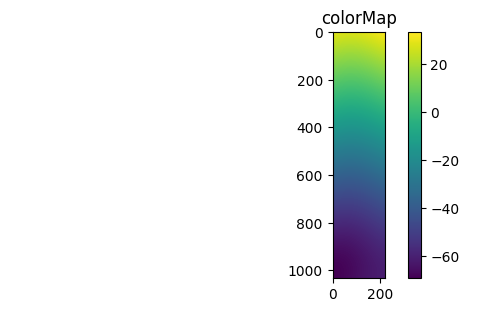

In [143]:
H =lat
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

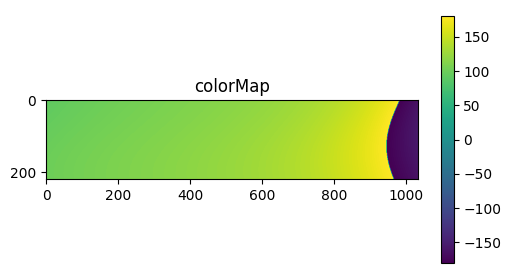

In [146]:
H =lon.T
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()


In [2]:
len([  ( i*1000 , (i+1)*1000 ) for i in range(int(1693000/1000)) ])

1693